## Generative AI - FineTuning LLM Models 

We will learn following 

- Quantization
- How finetuning works 
- How to perform FineTuning 
- LORA
- CLORA
- PEFT
- Projects (Open Source LLMs)
- FineTuning on custom dataset using Gemma Model 

### 1. Quantization 

Lets consider neural network , When we train neural network . We have weights in each layer . Weights are stored in form of matrix . Lets say we have 3*3 matrix . Every value in matrix is probably stored in memory in form of 32 bits . We denote it as FP32 (Full Precision / Single Precision) . In short its also known as Floating Point Number 

When we see different LLM models . We can see that parameters keeps on increasing . For Example LLAMA 2 with 70 Billion Parameters meaning it has 70 Billion Parameters in terms of weights .

Now lets say I want to use this model . Its not possible by anyone to do the finetuning of this model with Normal GPU and Limited RAM. 

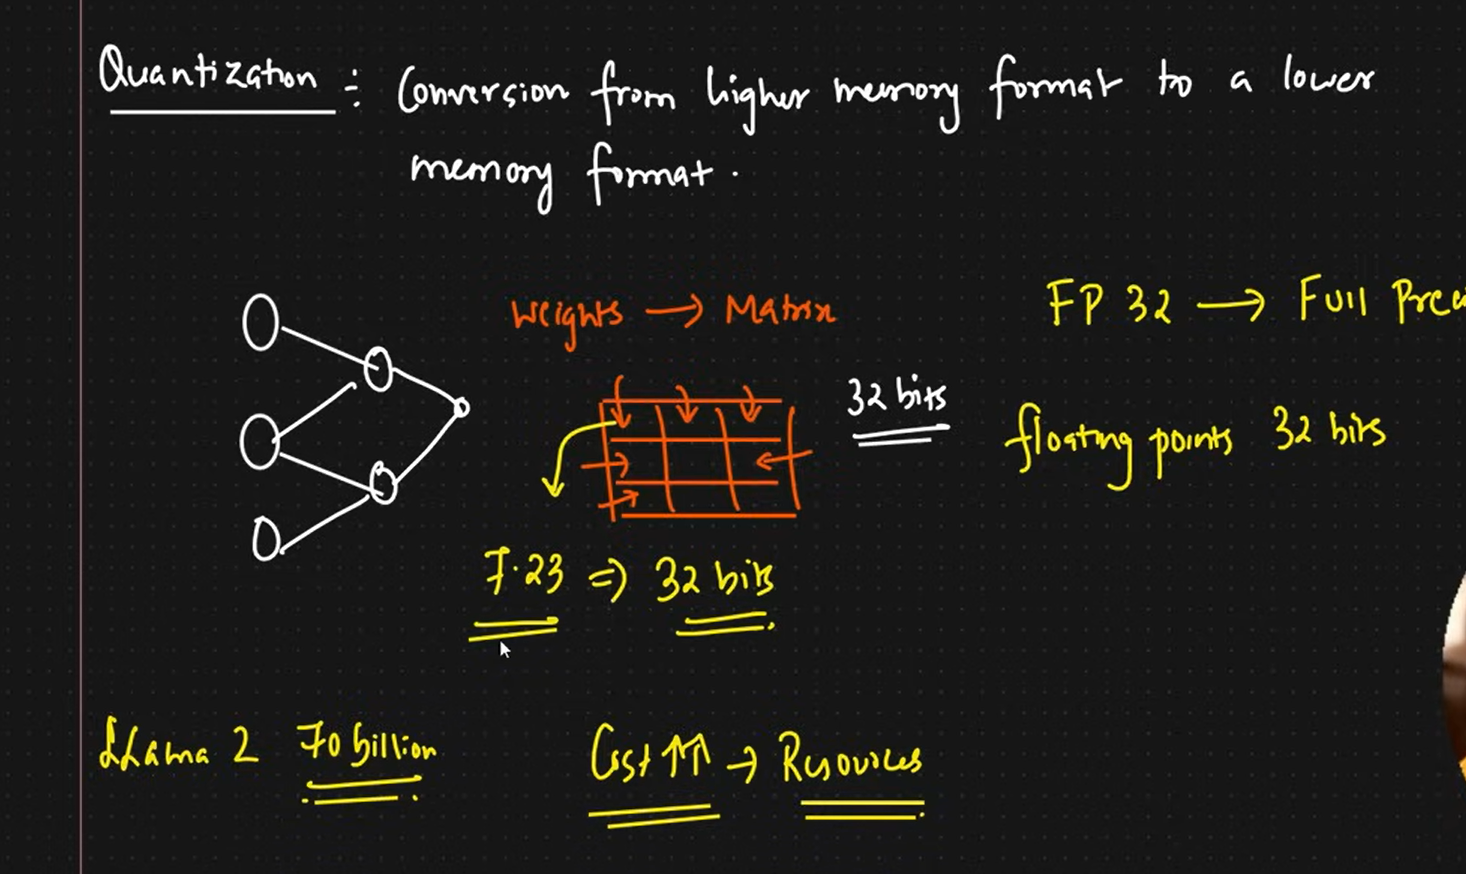

So instead of using this 32 Bits . We can use Quantization which will convert this FP32 to int8 and then download the model and Use IT .

We are converting from Higher memory format to lower memory format 

Why we are doing Quantization ?
- So that we can easily do inferencing (o/p - Processing) . Quantization also helps in reducing cost

Quantization of Model is usually done in following use cases 
- Mobile Phone
- Edge Devices 

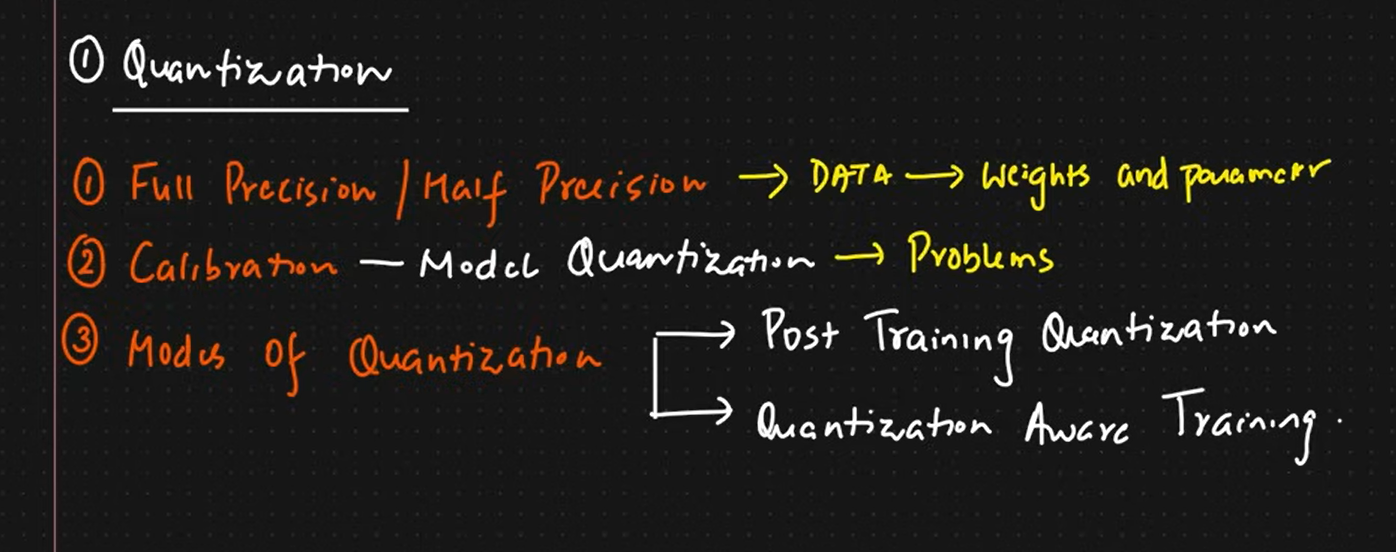

#### 1. Full Precision and Half Precision

Full Precision / Single Precision 
- FP32 (Full Precision)

Half Precision 
- When convert PF32 to FP16 . FP16 is called Half Precision

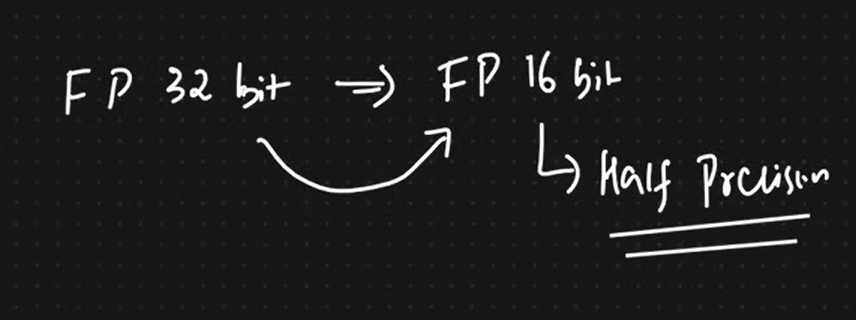

Once we compress the LLM Model using Quantization . We can then start FineTuning . But there are some Disadvantages when we do Quantization .

- Loss of Information 
- Loss of Accuracy 

To overcome above disadvantages . There are different Techniques used 

#### 2. Calibration

Calibration means "How we will be converting FP32 to int8 . What is the Mathematical Formula for converting this FP32 to int8"

Callibration is a process of squezing the values from higher format to lower format

#### How to perform Quantization 

- Symmetric Quantization  (Data is evenly distributed)
- Asymmetric Quantization 

#### Symmetric Quantization 

- Batch Normalization is a technique of Symmetric Quantization. Whenever we do forward or backward propogation in Deep learning . We apply Batch Normalization . So that all our weights are zero centered meaning entire distribution of weights will be near zero 

#### Symmetric uInt8 (Unsigned Int 8) Quantization 

Lets say we have Floating point numbers from 0 to 1000 which stored in 32 bits . In this Symmetric uInt8 Quantization. Our main aim is to convert this numbers in 32 bits to uInt8 . 

Unsigned means values will be ranging from 0-255

We have to convert 0-1000 to 0-255

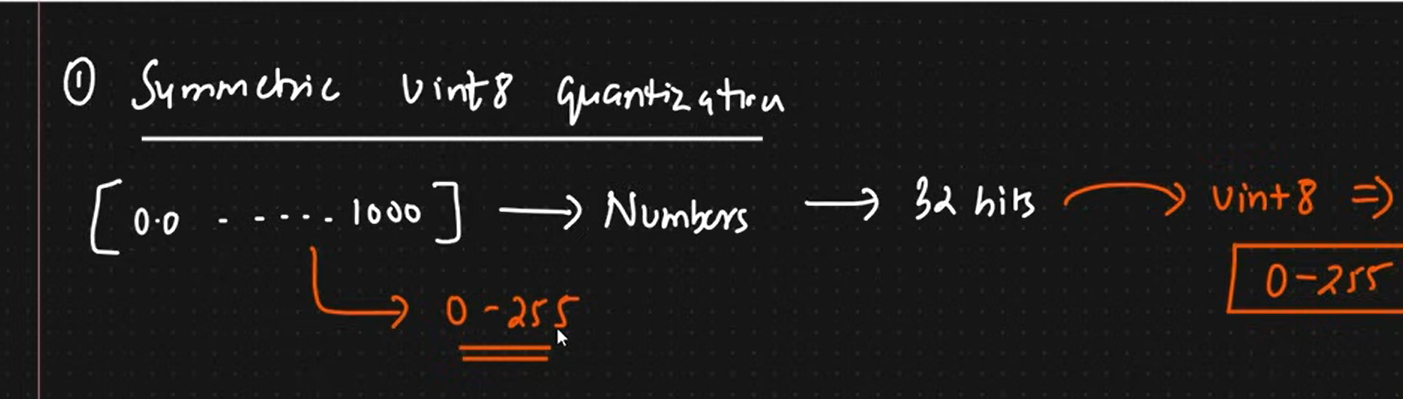

Lets say we have Single Precision FLoating Point 32 . 

- First bit will either have 0 or 1 (Signed Unsigned)
- Next 8 bits are for Exponent
- Next 23 bits for Mantissa (Fraction - Anything that comes after point.)

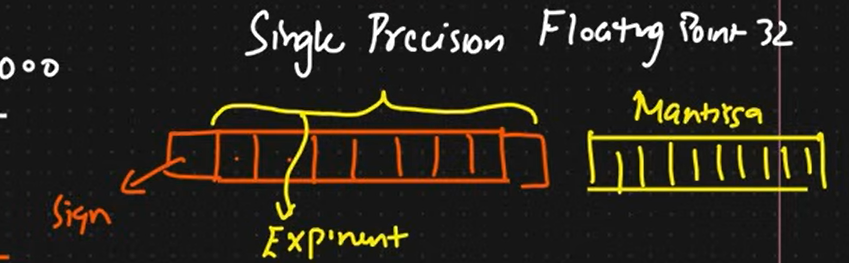

Example - 7.32 

- 1st Bit sign - Positive - 1
- Next Bits will be for 7
- Next 23 bits for 32

### Half Precision Floating point 16 

- 1st bit - Sign 
- Next 5 bits - Expoenent 
- Next 10 bits - Mantissa

Now we have to convert 0-1000 (32 Bit) to uInt8 (0-255) . We can use Min Max Scalar. Meaning our 0.0 should be Quantized to 0 and 1000 should be quantized to 255

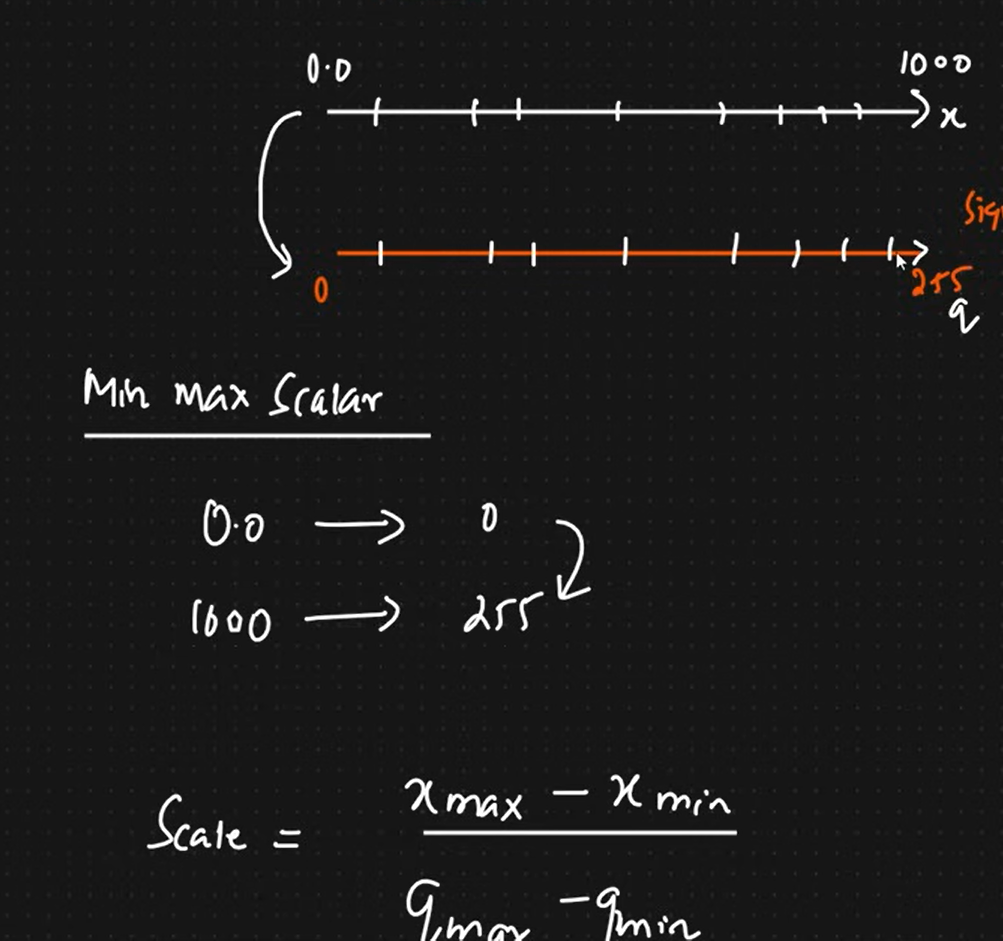


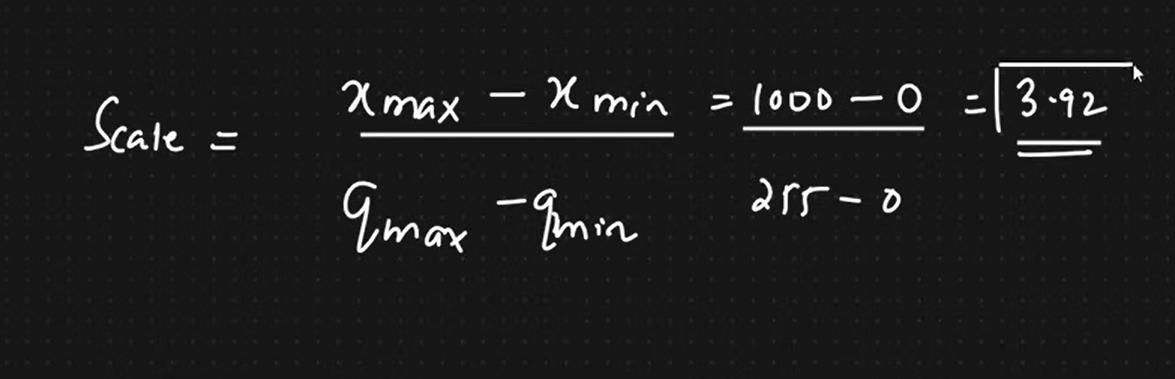

3.92 is called scale factor 

Meaning any number that we have in FP32 to UInt8 . We just need to use this scale along with Round Formula 

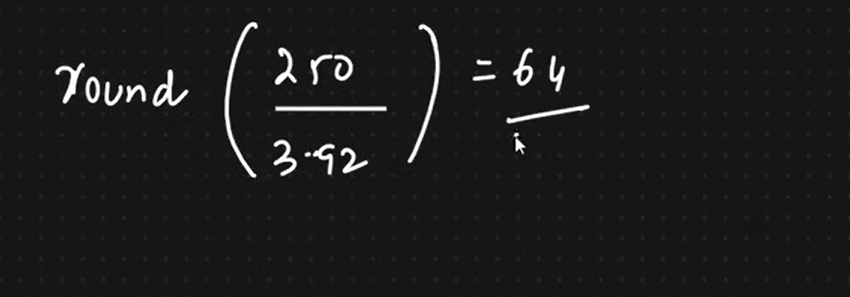


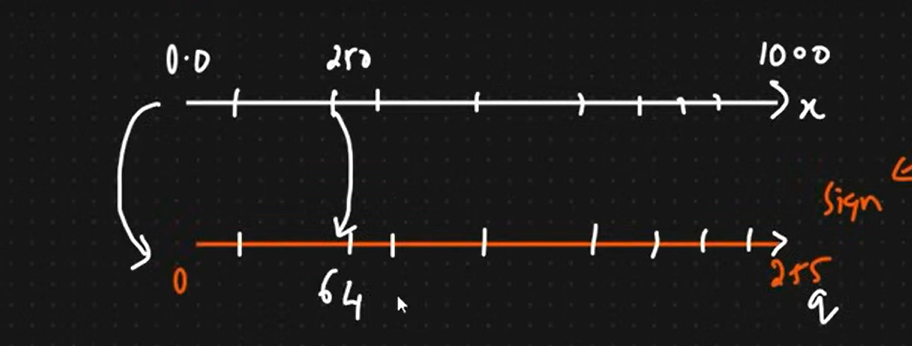


### Asymmetric Quantization 

Lets say we have numbers from -20 to 1000 . And now we have to convert this to 0 to 255 using Asymmetric Quantization.
In Asymmetric Quantization . Numbers are evenly distrubuted .It can be skewed . Now in this .If we apply Min Max similar to we applied in Symmetric .

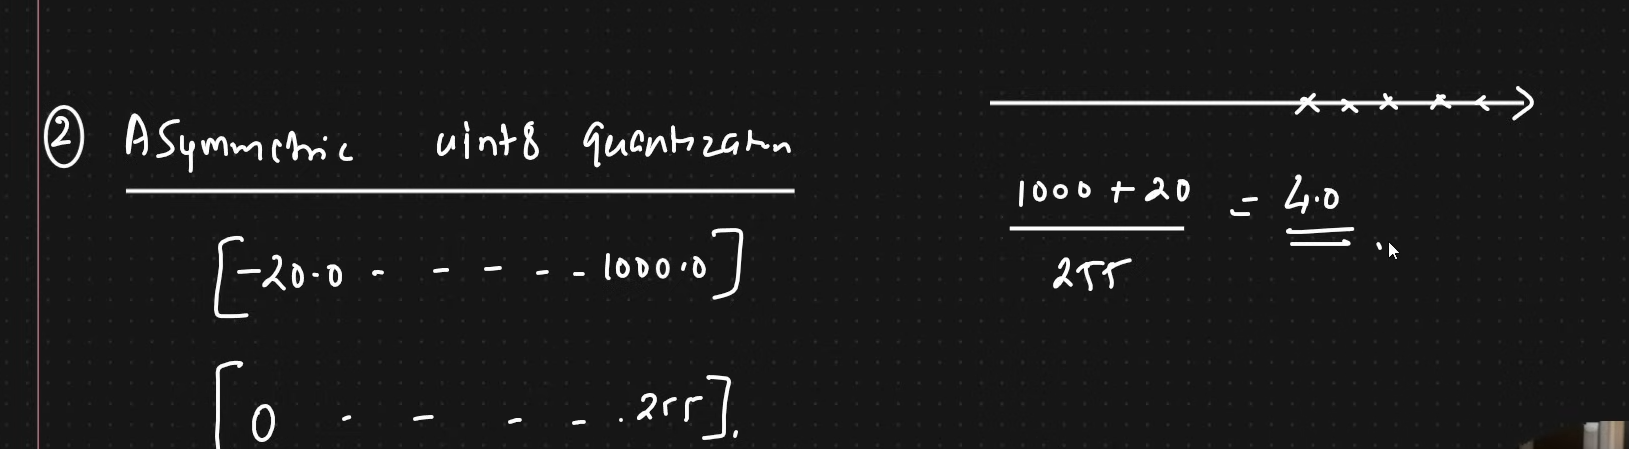

So 4.0 is a scale factor . Now we use this scale factor and try to convert any number .

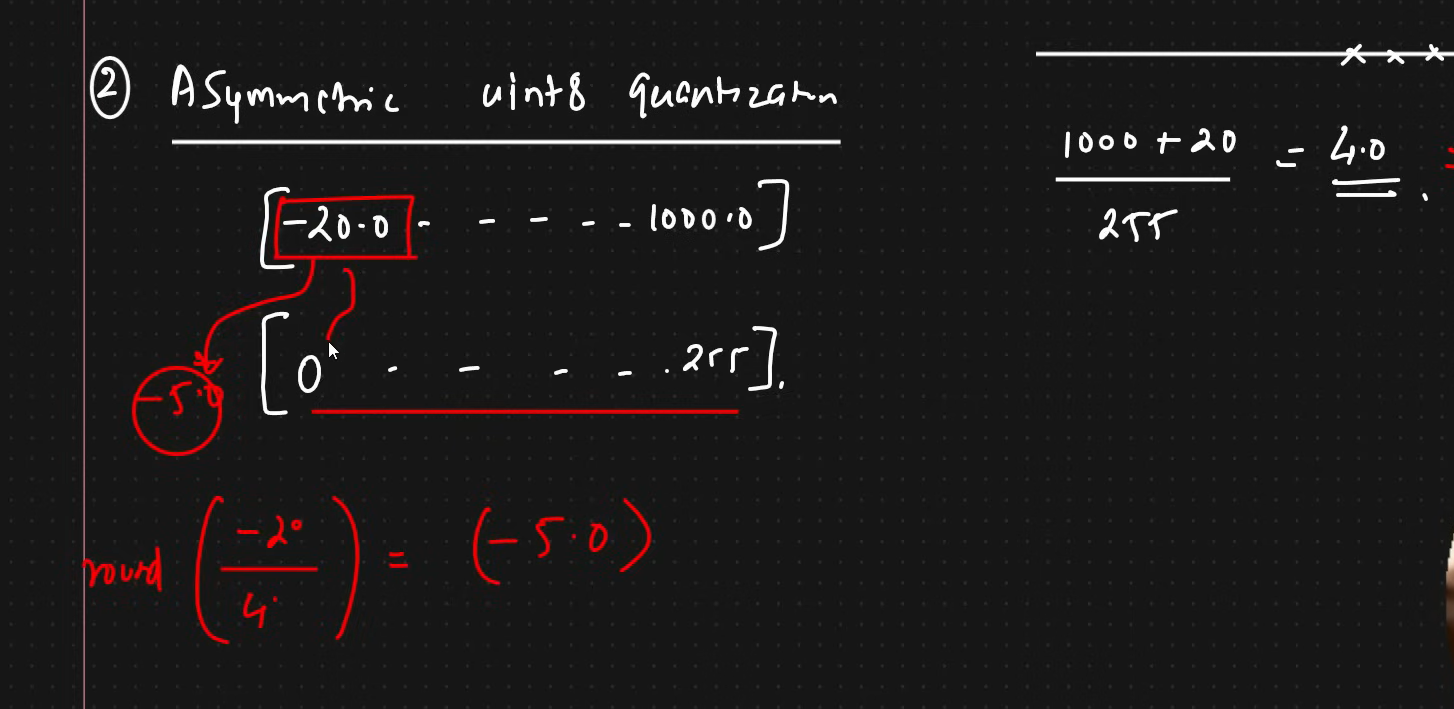

But our range starts from 0 to 255 . To resolve this we have to add +5 in it.

This +5 (same number) that we add is called Zero Point 

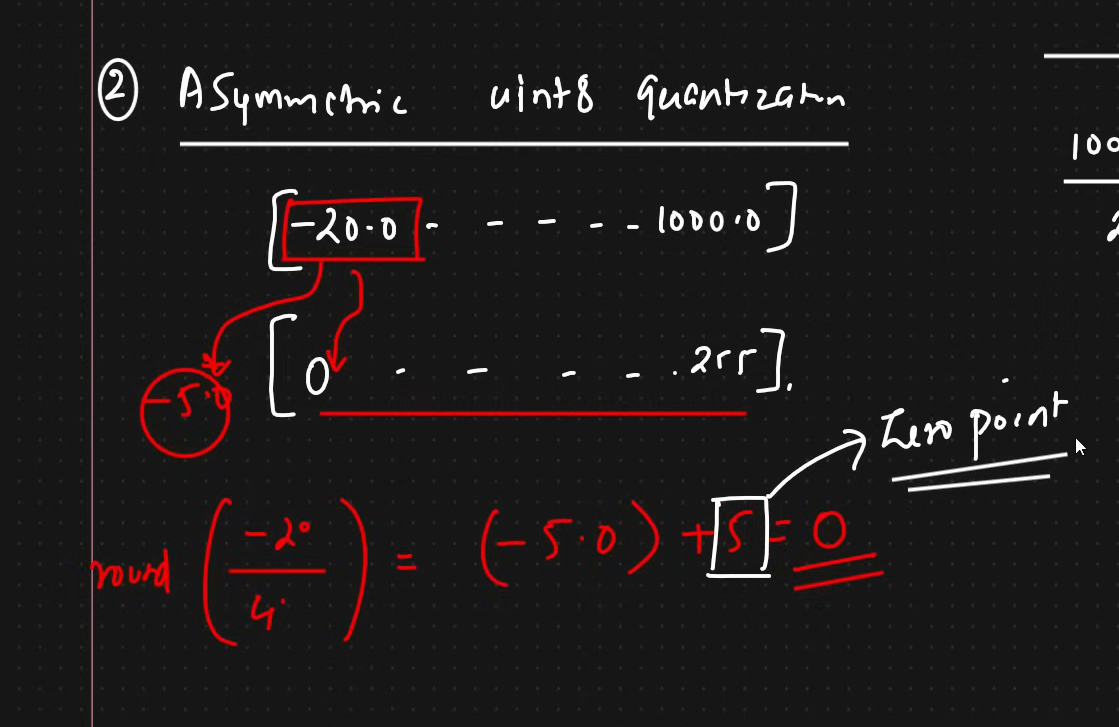


In Symmetric Quantization . Zero Point is 0 only.

Basically to perform Quantization . We require 2 parameters 
- Zero Point 
- Scale 

Signed Integer Ranges from -128 to 128

### 3. Modes of Quantization 

#### Post Training Quantization (PTQ)

- Here we already have a pre trained model and we apply calbiration (Squezing the values from high format to lower format) . Once calibration is done .We take weights data and then convert it into Quantized model

In PTQ , We have loss of data and accuracy decreases

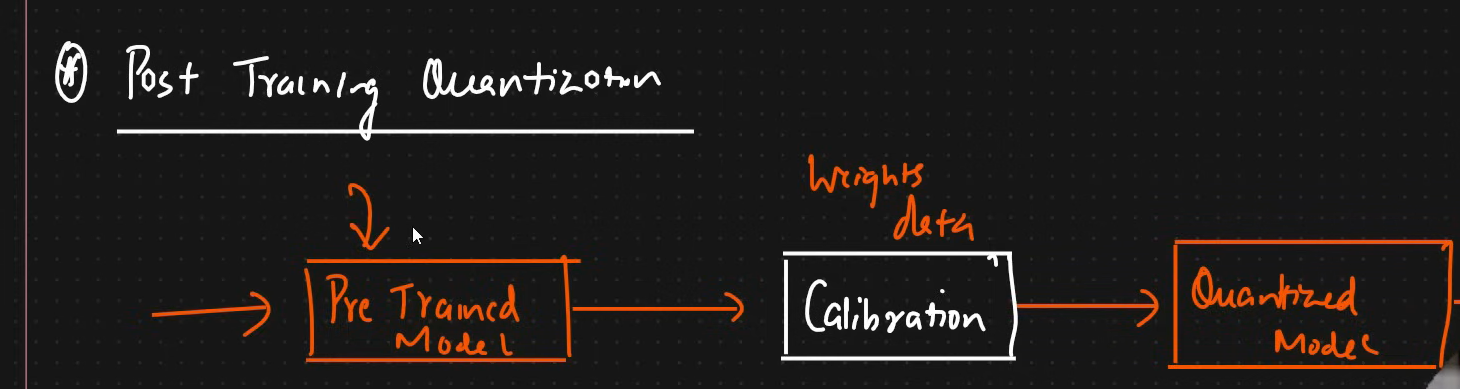

#### Quantization Aware Training (QAT)

We will take train model . Perform Quantization . Then will perform Fine Tunning  . In finetuning we take new training data . Once we take new training data we will fine tune the model and then we Quantize the model 

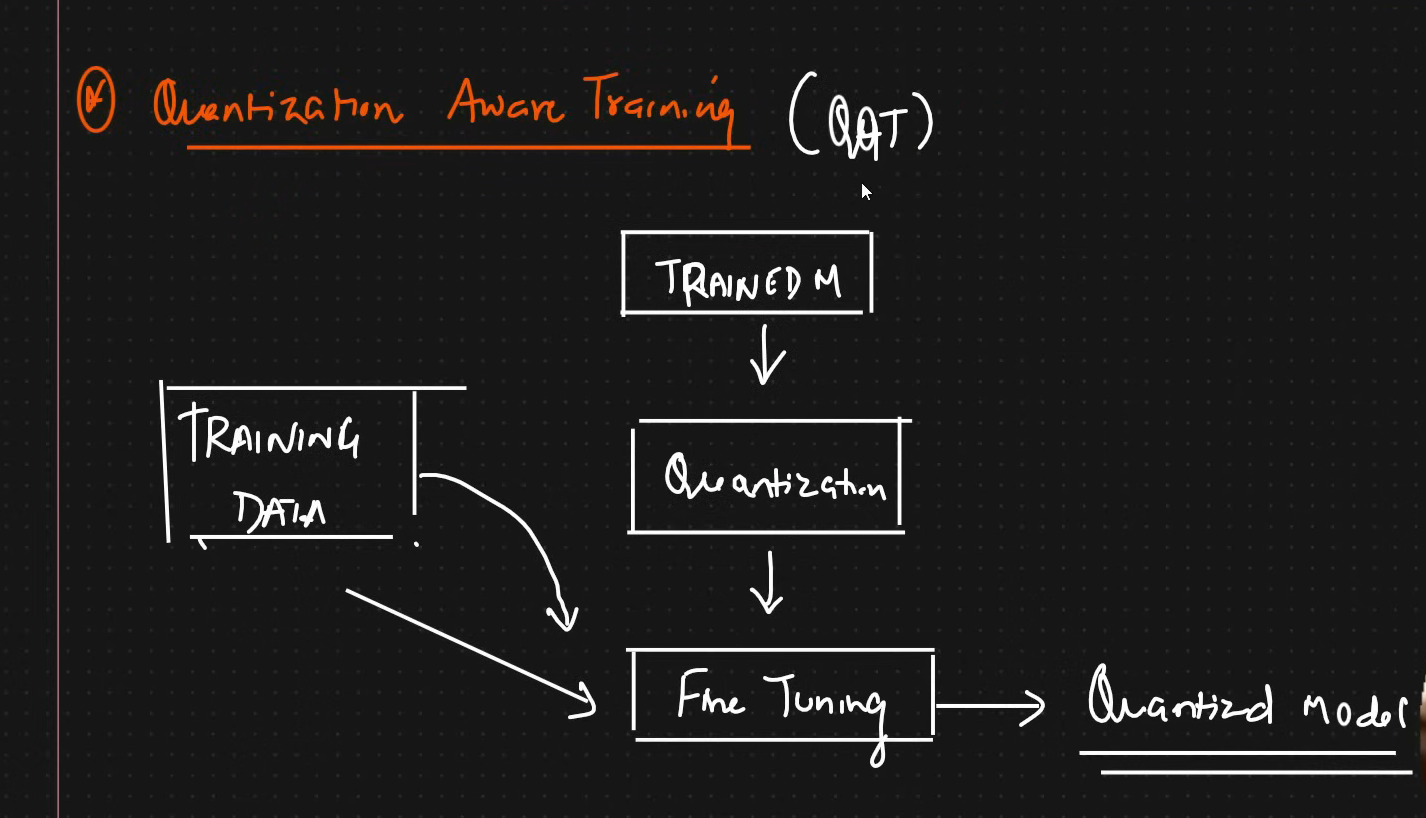